# Chaos in the Gym: A Monte Carlo Simulation of Dumbbell Misplacement

## Overview

In the realm of fitness enthusiasts and orderly gym environments, the simulation project "Chaos in the Gym" introduces a fascinating exploration of disorder through the lens of a seemingly mundane yet relatable scenario: the misplacement of dumbbells.

## Project Description

Employing the principles of Monte Carlo simulation, this Python-based project investigates the impact of introducing an agent of chaos—a gym-goer who consistently returns dumbbells to incorrect locations—within a community of diligent members who strive to maintain order.

At the core of this simulation is a dynamic virtual gym, meticulously crafted with object-oriented programming principles. It features two types of members: those who conscientiously return equipment to its rightful place, and the agents of chaos who disrupt this harmony. The simulation runs through numerous iterations, quantifying the chaos generated by varying proportions of orderly and disorderly participants. Moreover, data visualization techniques, particularly distribution plots, are employed to present the outcomes vividly, allowing for a visual analysis of the chaos patterns.

## Technological Stack

- **Programming Language:** Python

- **Libraries:**
  - Random: For generating random choices, simulating the unpredictable behaviors of gym users.
  - Seaborn: For data visualization, specifically for plotting the distribution of chaos levels in the gym.

- **Development Tools:**
  - VSCode: As the primary code editor, offering a robust environment for Python development.
  - Jupyter Lab: Used for interactive code testing and visualization, allowing for a more iterative approach to development and analysis.

### 1. Creating a structure for the gym

The first step is to create two classes: (i) a sort of shelf to store the dumbbells, and (ii) gym-goers who interact with the dumbbells by taking and returning them. This second class includes two types of users: Person 1, who always replaces their dumbbells in the right spot. However, if this person realizes the right spot is taken, he/she won't take the time to reorganize the dumbbells and will likely place their weights anywhere. Person 2 will always return their dumbbells without paying attention.

We'll begin by creating the Gym class and a method to save the exact positions where these dumbbells are stored. We'll have dumbbells ranging from 10 kg to 36 kg, and there will only be dumbbells in even weights.

Now, it's time to create a "shelf" for these dumbbells, so we'll use an empty dict whose keys are the dumbbells' positions and values are the weights that were taken. Users will take out one random value, replacing it with 0, and interact with them as programmed (if it's Person 1, they will properly replace it in the correct spot; if it's Person 2, they will replace it randomly).

It's also important to create a function to reset the day. So, when called upon, this function reorganizes the dumbbells to their correct places. The next attribute is a list of all the dumbbells that can be taken. Since we know that whenever someone takes a dumbbell, we replace the value with 0, we can establish that available dumbbells are those whose values are different from 0.

The next function is for taking a dumbbell. Other than 'self', there must also be a weight parameter. So, to determine the weight, I need to access the position of this dumbbell and change it to 0 in the dict. To do that, I need to know the dict key associated with the weight I chose. Hence, I'll convert values into a list and also use 'index': if I want the 14kg dumbbell, what is the key?

We have two more functions: one for returning dumbbells and another to calculate the chaos. The first one will calculate the dumbbell's position and its weight. The second function will calculate how many dumbbells are misplaced, in percentage.

Now, for returning a dumbbell, we update the dict at the position where we want to return this dumbbell and assign the weight to it. And finally, to calculate the chaos, since the 'items' method for the dict returns the pair key:value in tuples, we can unpack these tuples in a comprehension. This comprehension will return how many positions are different. This is a list, so I'll return the list divided by its size.

This is the main framework for our "virtual gym".

In [4]:
import random

class Gym:
    def __init__(self):
        self.dumbbells = [i for i in range(10, 37) if i % 2 == 0]
        self.dumbbell_shelf = {}
        self.reset_day()
        
    def reset_day(self):
        self.dumbbell_shelf = {i: i for i in self.dumbbells}
    
    def list_dumbbells(self):
        return [i for i in self.dumbbell_shelf.values() if i != 0]
    
    def list_spaces(self):
        return [i for i, j in self.dumbbell_shelf.items() if j == 0]
    
    def take_dumbbell(self, weight):
        dumbbell_position = list(self.dumbbell_shelf.values()).index(weight)
        dumbbell_key = list(self.dumbbell_shelf.keys())[dumbbell_position]
        self.dumbbell_shelf[dumbbell_key] = 0
        return weight

    def dumbbell_return(self, pos, weight):
        self.dumbbell_shelf[pos] = weight

    def chaos_calculation(self):
        num_chaos = [i for i, j, in self.dumbbell_shelf.items() if i != j]
        return len(num_chaos) / len(self.dumbbell_shelf)

self = Gym()

### 2. Creating the users

When creating the User class, we'll add an attribute to indicate the type of user he/she is. Additionally, there's another attribute called gym, which works as an instance of the gym. Hence, every user will have within themselves a variable that represents an object within the gym they all share.

There's a function to start the day at the gym. It's quite straightforward: a list of weights is named as a list of available dumbbells at the gym. The user will choose a weight at random.

The most crucial function triggers when the workout is done, as the type of user becomes significant. If the user is type 1 and the spot for the dumbbell he/she is replacing is available, user 1 will always put it back correctly. Otherwise, user 1 will replace the dumbbell anywhere.

For type 2 users, randomness is always present, simplifying the code. Afterward, the weight is set to 0.

In [7]:
class User:
    def __init__(self, type, gym):
        self.type = type
        self.gym = gym
        self.weight = 0

    def start_training(self):
        list_weight = self.gym.list_dumbbells()
        self.weight = random.choice(list_weight)
        self.gym.take_dumbbell(self.weight)

    def end_training(self):
        spaces = self.gym.list_spaces()

        if self.type == 1:
            if self.weight in spaces:
                self.dumbbell_return(self.weight, self.weight)
            else:
                pos = random.choice(spaces)
                self.gym.dumbbell_return(pos)

        if self.type == 2:
            pos = random.choice(spaces)
            self.gym.dumbbell_return(pos)
        self.weight = 0

### 3. Final touch
We create the gym instance and a list of users using list comprehension, ensuring all users refer to the same instance. This setup implies that any variable change impacts all users. We'll start with ten type 1 users and one type 2 user (the messy one).

Next, we employ 'random.shuffle' to mix this list of users, and each undergoes 10 training sessions.

In [15]:
gym = Gym()

users = [User(1, gym) for i in range(10)]
users += [User(2, gym) for i in range(1)]
random.shuffle(users)

for i in range(10):
    random.shuffle(users)
    for user in users:
        user.start_training()
    for user in users:
        user.end_training()

gym.dumbbell_shelf
gym.chaos_calculation()

0.15384615384615385

It's time to test!

In [16]:
import random

class Gym:
    def __init__(self):
        self.dumbbells = [i for i in range(10, 36) if i % 2 == 0]
        self.dumbbell_shelf = {}
        self.reset_day()
        
    def reset_day(self):
        self.dumbbell_shelf = {i: i for i in self.dumbbells}
    
    def list_dumbbells(self):
        return [i for i in self.dumbbell_shelf.values() if i != 0]
    
    def list_spaces(self):
        return [i for i, j in self.dumbbell_shelf.items() if j == 0]
    
    def take_dumbbell(self, weight):
        dumbbell_position = list(self.dumbbell_shelf.values()).index(weight)
        dumbbell_key = list(self.dumbbell_shelf.keys())[dumbbell_position]
        self.dumbbell_shelf[dumbbell_key] = 0
        return weight

    def dumbbell_return(self, pos, weight):
        self.dumbbell_shelf[pos] = weight

    def chaos_calculation(self):
        num_chaos = [i for i, j, in self.dumbbell_shelf.items() if i != j]
        return len(num_chaos) / len(self.dumbbell_shelf)

class User:
    def __init__(self, type, gym):
        self.type = type
        self.gym = gym
        self.weight = 0

    def start_training(self):
        list_weight = self.gym.list_dumbbells()
        self.weight = random.choice(list_weight)
        self.gym.take_dumbbell(self.weight)

    def end_training(self):
        spaces = self.gym.list_spaces()

        if self.type == 1:
            if self.weight in spaces:
                self.gym.dumbbell_return(self.weight, self.weight)
            else:
                pos = random.choice(spaces)
                self.gym.dumbbell_return(pos, self.weight)

        if self.type == 2:
            pos = random.choice(spaces)
            self.gym.dumbbell_return(pos, self.weight)
        self.weight = 0

gym = Gym()

users = [User(1, gym) for i in range(10)]
users += [User(2, gym) for i in range(1)]
random.shuffle(users)

for i in range(10):
    random.shuffle(users)
    for user in users:
        user.start_training()
    for user in users:
        user.end_training()

gym.dumbbell_shelf
gym.chaos_calculation()

0.38461538461538464

Great! It's working.
Now, since we're running a Monte Carlo simulation, let's use Seaborn to map these results.

First, let's work with a 50 simulation scenario.

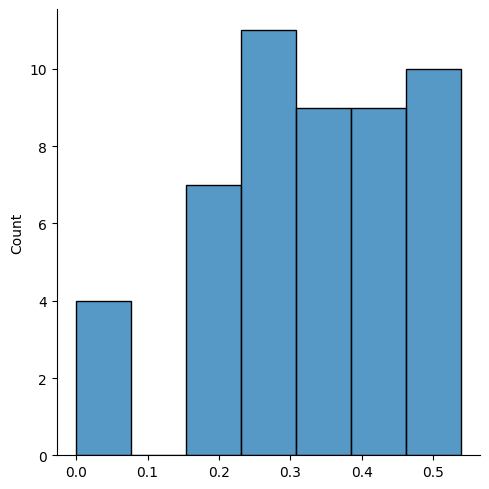

In [3]:
import random

class Gym:
    def __init__(self):
        self.dumbbells = [i for i in range(10, 36) if i % 2 == 0]
        self.dumbbell_shelf = {}
        self.reset_day()
        
    def reset_day(self):
        self.dumbbell_shelf = {i: i for i in self.dumbbells}
    
    def list_dumbbells(self):
        return [i for i in self.dumbbell_shelf.values() if i != 0]
    
    def list_spaces(self):
        return [i for i, j in self.dumbbell_shelf.items() if j == 0]
    
    def take_dumbbell(self, weight):
        dumbbell_position = list(self.dumbbell_shelf.values()).index(weight)
        dumbbell_key = list(self.dumbbell_shelf.keys())[dumbbell_position]
        self.dumbbell_shelf[dumbbell_key] = 0
        return weight

    def dumbbell_return(self, pos, weight):
        self.dumbbell_shelf[pos] = weight

    def chaos_calculation(self):
        num_chaos = [i for i, j, in self.dumbbell_shelf.items() if i != j]
        return len(num_chaos) / len(self.dumbbell_shelf)

class User:
    def __init__(self, type, gym):
        self.type = type
        self.gym = gym
        self.weight = 0

    def start_training(self):
        list_weight = self.gym.list_dumbbells()
        self.weight = random.choice(list_weight)
        self.gym.take_dumbbell(self.weight)

    def end_training(self):
        spaces = self.gym.list_spaces()

        if self.type == 1:
            if self.weight in spaces:
                self.gym.dumbbell_return(self.weight, self.weight)
            else:
                pos = random.choice(spaces)
                self.gym.dumbbell_return(pos, self.weight)

        if self.type == 2:
            pos = random.choice(spaces)
            self.gym.dumbbell_return(pos, self.weight)
        self.weight = 0

gym = Gym()

users = [User(1, gym) for i in range(10)]
users += [User(2, gym) for i in range(1)]
random.shuffle(users)

list_chaos = []

for k in range(50):
    gym.reset_day()
    for i in range(10):
        random.shuffle(users)
        for user in users:
            user.start_training()
        for user in users:
            user.end_training()
    list_chaos += [gym.chaos_calculation()]

import seaborn as sns
sns.displot(list_chaos)

## Conclusion
The Monte Carlo simulation developed in this project offers a nuanced understanding of how individual behaviors impact collective order, particularly in communal spaces like gyms. Through the iterative process and statistical analysis, our findings reveal a significant inclination towards disorder, even with a minimal presence of non-compliant individuals—representing only 5% of the total user base. This underscores the disproportionate impact that a single agent of chaos can have on the overall system's efficiency and orderliness.

By leveraging a graphical representation of the simulation outcomes, we observed a consistent trend where the level of disarray within the gym environment escalated, highlighting the critical role that individual responsibility plays in maintaining communal harmony. This project not only sheds light on the dynamics of shared spaces but also illustrates the broader implications of individual actions on collective environments.

In essence, this simulation serves as a compelling reminder of the delicate balance between individual freedom and collective order. It provides a foundation for further exploration into behavioral interventions and policy-making aimed at enhancing cooperation and efficiency in shared spaces.